# Bike Sharing EDA
## Trinity Gahagen
---

A collaborative project working with Bailey Snee on the [Bike Sharing Demand Kaggle competiton](https://www.kaggle.com/competitions/bike-sharing-demand/overview). This notebook is my own personal initial EDA of the dataset provided (the training dataset).

The following description was taken from the Kaggle page.

>Dataset Description
>
>You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.
>
>Data Fields\
>datetime - hourly date + timestamp\
>season -  1 = spring, 2 = summer, 3 = fall, 4 = winter\
>holiday - whether the day is considered a holiday\
>workingday - whether the day is neither a weekend nor holiday\
>weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy\
>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\
>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\
>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\
>temp - temperature in Celsius\
>atemp - "feels like" temperature in Celsius\
>humidity - relative humidity\
>windspeed - wind speed\
>casual - number of non-registered user rentals initiated\
>registered - number of registered user rentals initiated\
>count - number of total rentals

In [52]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
# Read in data
training_set = pd.read_csv('train.csv')

In [3]:
# Look at dataset
training_set.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# View column information
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# Descriptive statistics
training_set.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Read in testing set
testing_set = pd.read_csv('test.csv')

In [ ]:
# View testing set column information
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


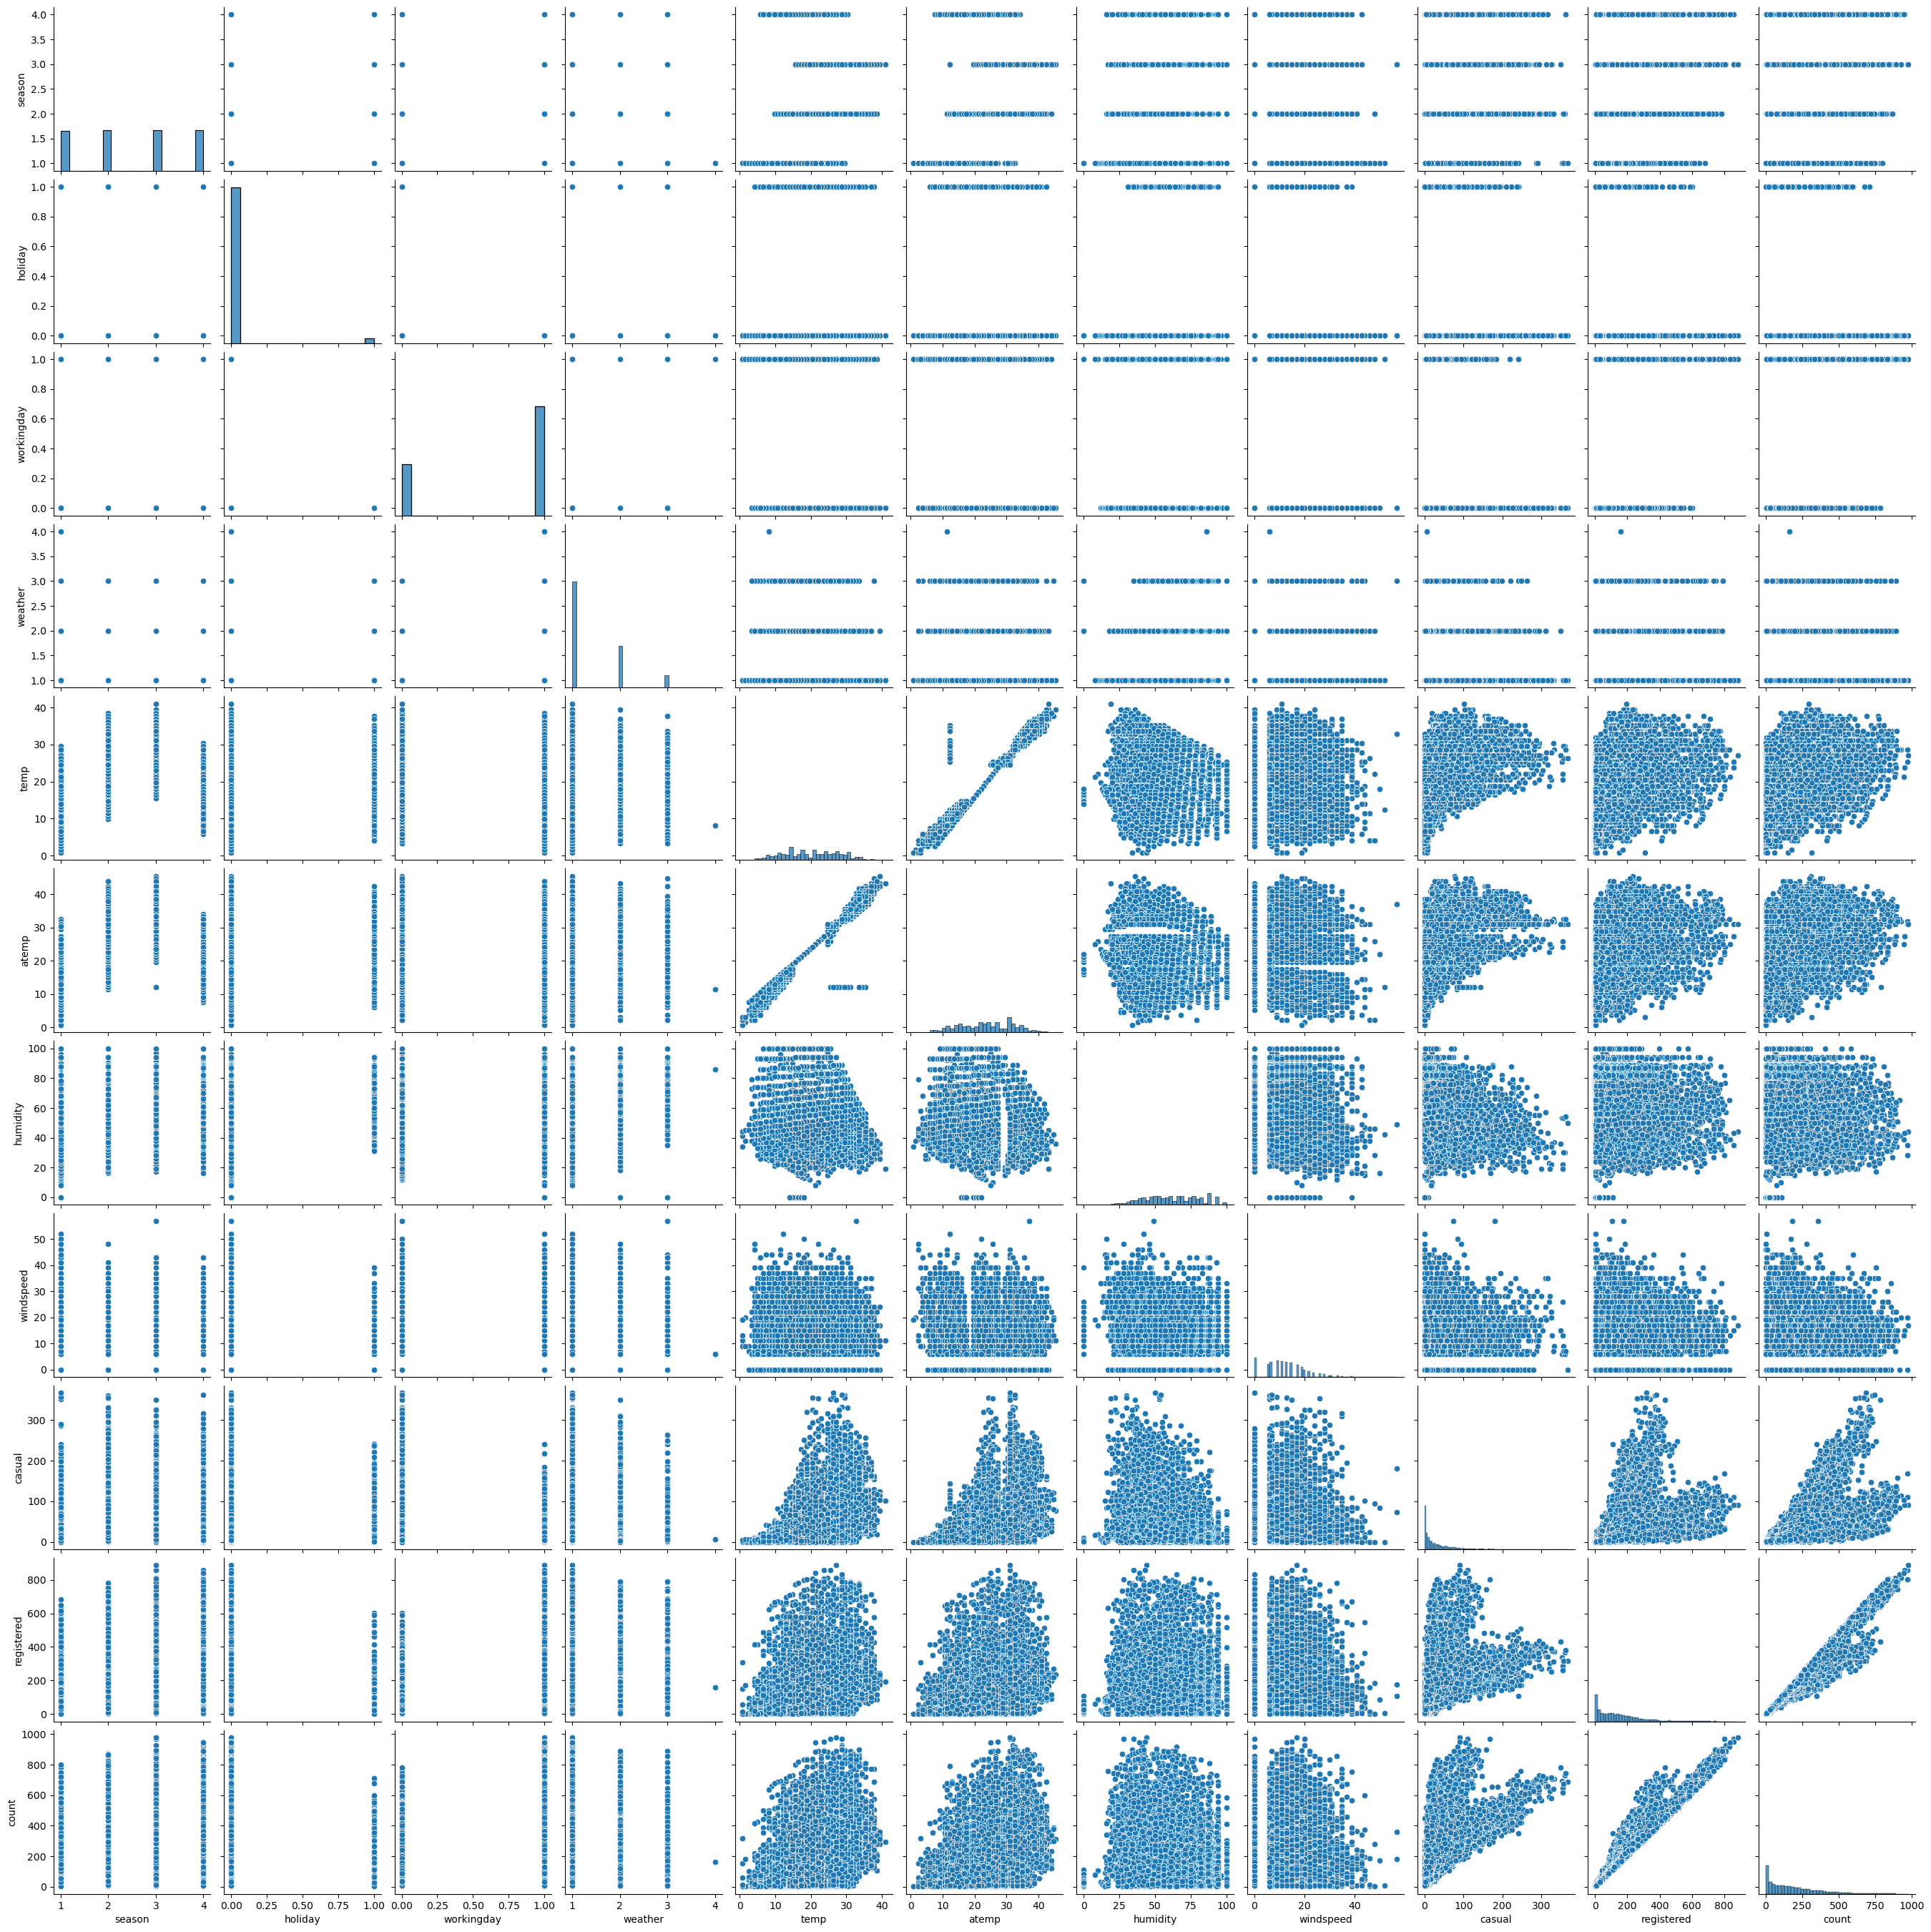

In [8]:
sns.pairplot(training_set);

There appears to be no strong correlation between most columns and the target variable, `count`. `casual` and `registered` are a linear combination of `count`, so there is a strong correlation there. `temp` and `atemp` are of course also highly correlated, and `temp` appears to have some sort of positive relationship with `count`.

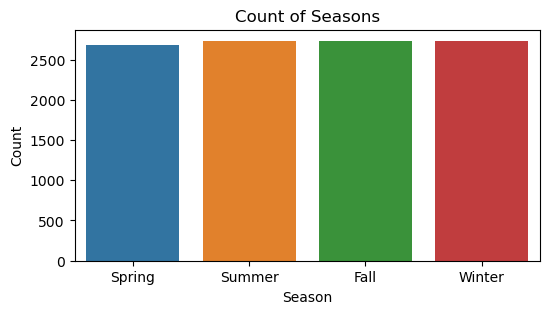

In [9]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.countplot(data=training_set, x='season', ax=ax, hue='season', palette='tab10')

ax.legend_ = None
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_xticks([0, 1, 2, 3])
ax.set_title('Count of Seasons')
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter']);

The class distribution of the different seasons appears to be about equal, with only slightly fewer observations occurring in the Spring.

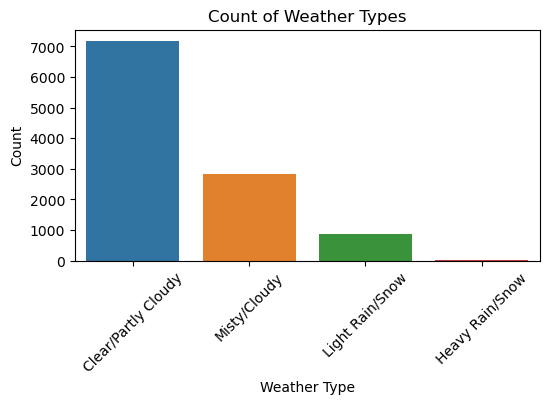

In [10]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.countplot(data=training_set, x='weather', ax=ax, hue='weather', palette='tab10')

ax.legend_ = None
ax.set_xlabel('Weather Type')
ax.set_ylabel('Count')
ax.set_xticks([0, 1, 2, 3])
ax.set_title('Count of Weather Types')
ax.set_xticklabels(['Clear/Partly Cloudy', 'Misty/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'], rotation=45);

The results here are unsurprising: the more cloudy/rainy/snowy the weather is, the less likely people are going to go biking.

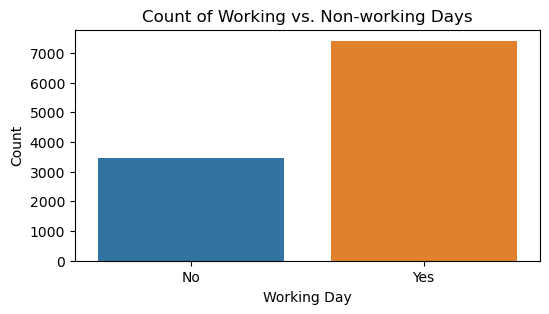

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.countplot(data=training_set, x='workingday', ax=ax, hue='workingday', palette='tab10')

ax.legend_ = None
ax.set_xlabel('Working Day')
ax.set_ylabel('Count')
ax.set_xticks([0, 1])
ax.set_title('Count of Working vs. Non-working Days')
ax.set_xticklabels(['No', 'Yes']);

There are many more observations taking place during the weekdays vs. the weekends.

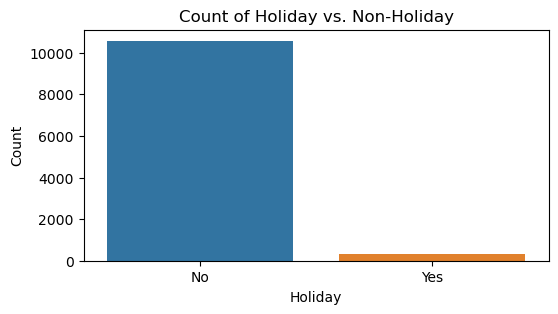

In [12]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.countplot(data=training_set, x='holiday', ax=ax, hue='holiday', palette='tab10')

ax.legend_ = None
ax.set_xlabel('Holiday')
ax.set_ylabel('Count')
ax.set_xticks([0, 1])
ax.set_title('Count of Holiday vs. Non-Holiday')
ax.set_xticklabels(['No', 'Yes']);

There are far fewer observations taking place on holidays than non-holidays.

In [ ]:
# Convert the datetime column to datetime
training_set['datetime'] = pd.to_datetime(training_set['datetime'])
print(training_set['datetime'].dtype)

datetime64[ns]


In [ ]:
# Separate date and time into different columns
training_set['date'] = training_set['datetime'].dt.date
training_set['time'] = training_set['datetime'].dt.time

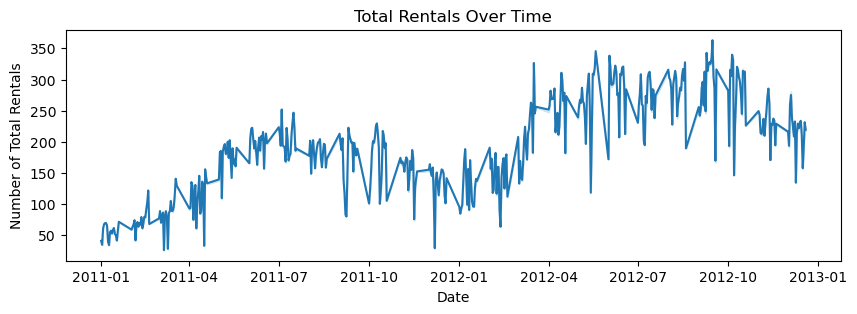

In [15]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.lineplot(data=training_set, x='date', y='count', ax=ax, errorbar=('ci', False))
ax.set_xlabel('Date')
ax.set_ylabel('Number of Total Rentals')
ax.set_title('Total Rentals Over Time');

The total number of rentals on a given day appears to trend upwards overall, and there are many more rentals during the summer months than the fall and winter, particularly between May and August.

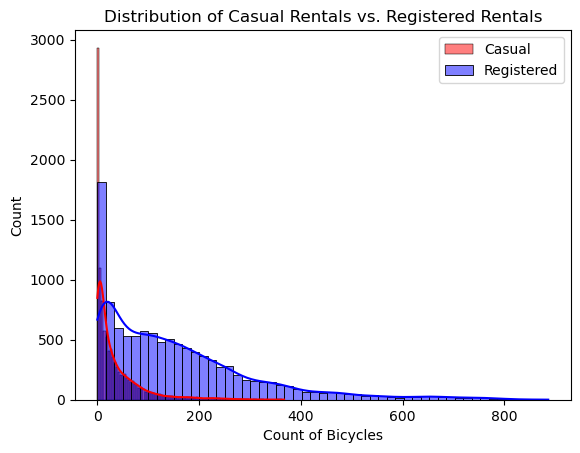

In [16]:
fig, ax = plt.subplots()
sns.histplot(data=training_set, x='casual', color='red', kde=True, ax=ax, label='Casual')
sns.histplot(data=training_set, x='registered', color='blue', kde=True, ax=ax, label='Registered')
ax.legend()
ax.set_xlabel('Count of Bicycles')
ax.set_title('Distribution of Casual Rentals vs. Registered Rentals');

In [ ]:
# Sanity check
training_set.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


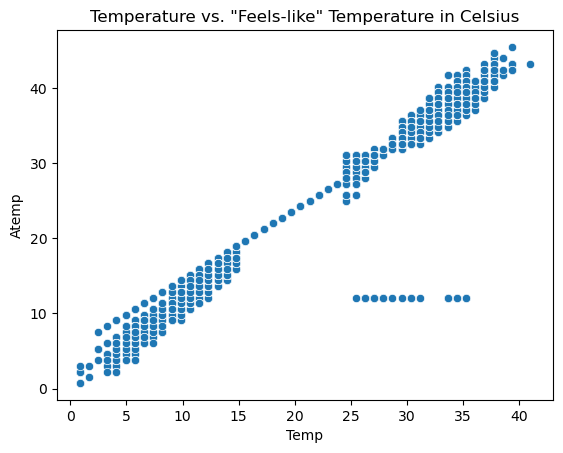

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=training_set, x='temp', y='atemp', ax=ax)
ax.set_title('Temperature vs. "Feels-like" Temperature in Celsius')
ax.set_xlabel('Temp')
ax.set_ylabel('Atemp');

When looking at the relationship between temperature and the "feels-like" temperature `atemp`, are a few observations where they are all the same value, around the threshold of about 10-15.

In [22]:
training_set[(training_set['temp'] > 20) & (training_set['atemp'] < 20)].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,67,88,2012-08-17,00:00:00
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,38,54,2012-08-17,01:00:00
8993,2012-08-17 02:00:00,3,0,1,1,27.06,12.12,61,8.9981,4,15,19,2012-08-17,02:00:00
8994,2012-08-17 03:00:00,3,0,1,1,26.24,12.12,65,7.0015,0,6,6,2012-08-17,03:00:00
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,9,9,2012-08-17,04:00:00


In [25]:
training_set.loc[(training_set['temp'] > 20) & (training_set['atemp'] < 20), 'date'].unique()

array([datetime.date(2012, 8, 17)], dtype=object)

In [33]:
training_set.loc[(training_set['temp'] > 20) & (training_set['atemp'] < 20), 'atemp'].unique()

array([12.12])

In [26]:
len(training_set.loc[(training_set['temp'] > 20) & (training_set['atemp'] < 20), 'date'])

24

There are 24 rows where "atemp" (the "feels-like" temperature) is 12.12, all on the same day, which indicates that there may have been some kind of measurement error. My partner and I will consider either dropping these rows, or just dropping the "atemp" column altogether.

In [ ]:
# Convert celsius to fahrenheit
training_set['temp_f'] = (9.0/5.0) * training_set['temp'] + 32
training_set[['temp', 'temp_f']].head()

,temp,temp_f
0,9.84,49.712
1,9.02,48.236
2,9.02,48.236
3,9.84,49.712
4,9.84,49.712


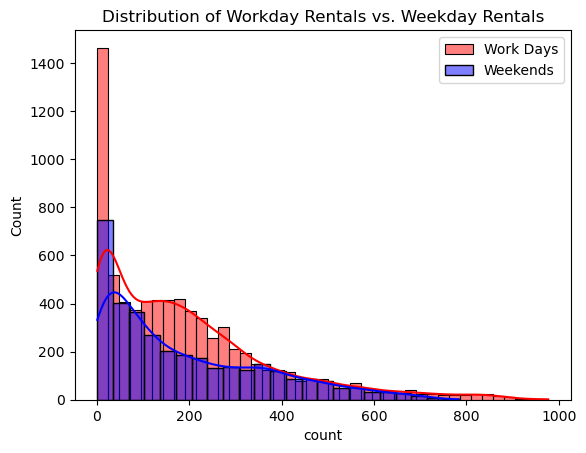

In [91]:
# Compare the distributions of the workdays vs. the weekends
WORKDAYS = training_set.loc[training_set['workingday'] == 1]
WEEKENDS = training_set[training_set['workingday'] == 0]

fig, ax = plt.subplots()
sns.histplot(data=WORKDAYS, x='count', kde=True, color='red', ax=ax, label='Work Days')
sns.histplot(data=WEEKENDS, x='count', kde=True, color='blue', ax=ax, label='Weekends')
ax.set_title('Distribution of Workday Rentals vs. Weekday Rentals')
plt.legend();

The distributions are extremely right skewed. I will use the logarithmic transform of the count to see if we can get a better sense of the two distributions.

C:\Users\twitt\AppData\Local\Temp\ipykernel_26596\4147941991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WORKDAYS['log_count'] = np.log(WORKDAYS['count'])
C:\Users\twitt\AppData\Local\Temp\ipykernel_26596\4147941991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WEEKENDS['log_count'] = np.log(WEEKENDS['count'])


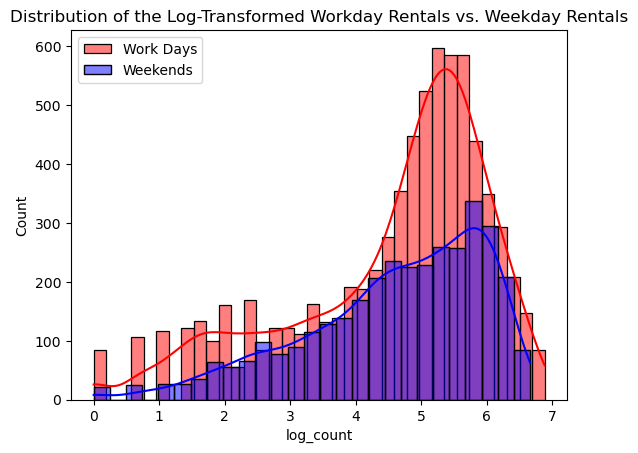

In [92]:
WORKDAYS['log_count'] = np.log(WORKDAYS['count'])
WEEKENDS['log_count'] = np.log(WEEKENDS['count'])

fig, ax = plt.subplots()
sns.histplot(data=WORKDAYS, x='log_count', kde=True, color='red', ax=ax, label='Work Days')
sns.histplot(data=WEEKENDS, x='log_count', kde=True, color='blue', ax=ax, label='Weekends')
ax.set_title('Distribution of the Log-Transformed Workday Rentals vs. Weekday Rentals')
plt.legend();

In [55]:
stat, p_val = stats.mannwhitneyu(WORKDAYS['log_count'], WEEKENDS['log_count'])
if p_val < 0.05:
    print('p-value < 0.05')
else:
    print('p-value > 0.05')
print(p_val)

p-value > 0.05
0.9679139953914079


Using a non-parametric statistical test and setting the significance level to 0.05, there is not sufficient evidence to suggest that the difference between the two distributions is different.

C:\Users\twitt\AppData\Local\Temp\ipykernel_26596\1900404787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOLIDAYS['log_count'] = np.log(HOLIDAYS['count'])
C:\Users\twitt\AppData\Local\Temp\ipykernel_26596\1900404787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NON_HOLIDAYS['log_count'] = np.log(NON_HOLIDAYS['count'])


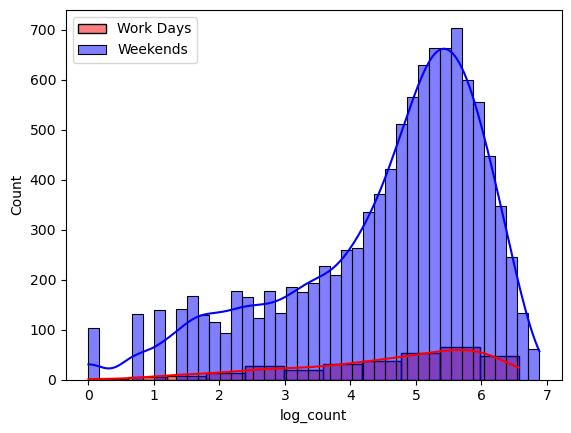

In [89]:
HOLIDAYS = training_set.loc[training_set['holiday'] == 1]
NON_HOLIDAYS = training_set[training_set['holiday'] == 0]

HOLIDAYS['log_count'] = np.log(HOLIDAYS['count'])
NON_HOLIDAYS['log_count'] = np.log(NON_HOLIDAYS['count'])

fig, ax = plt.subplots()
sns.histplot(data=HOLIDAYS, x='log_count', kde=True, color='red', ax=ax, label='Work Days')
sns.histplot(data=NON_HOLIDAYS, x='log_count', kde=True, color='blue', ax=ax, label='Weekends')
plt.legend();

In [90]:
stat, p_val = stats.mannwhitneyu(HOLIDAYS['log_count'], NON_HOLIDAYS['log_count'])
if p_val < 0.05:
    print('p-value < 0.05')
else:
    print('p-value > 0.05')
print(p_val)

p-value > 0.05
0.8646355678725027


The same thing goes for the holidays vs. the non-holidays.

In [93]:
# Granularizing the datetime column even further
training_set['month'] = training_set['datetime'].dt.month
training_set['day_of_week'] = training_set['datetime'].dt.day_of_week
training_set['hour'] = training_set['datetime'].dt.hour

In [99]:
try:
    training_set = training_set.drop(columns=['temp'])
except:
    print('Already dropped')

Already dropped


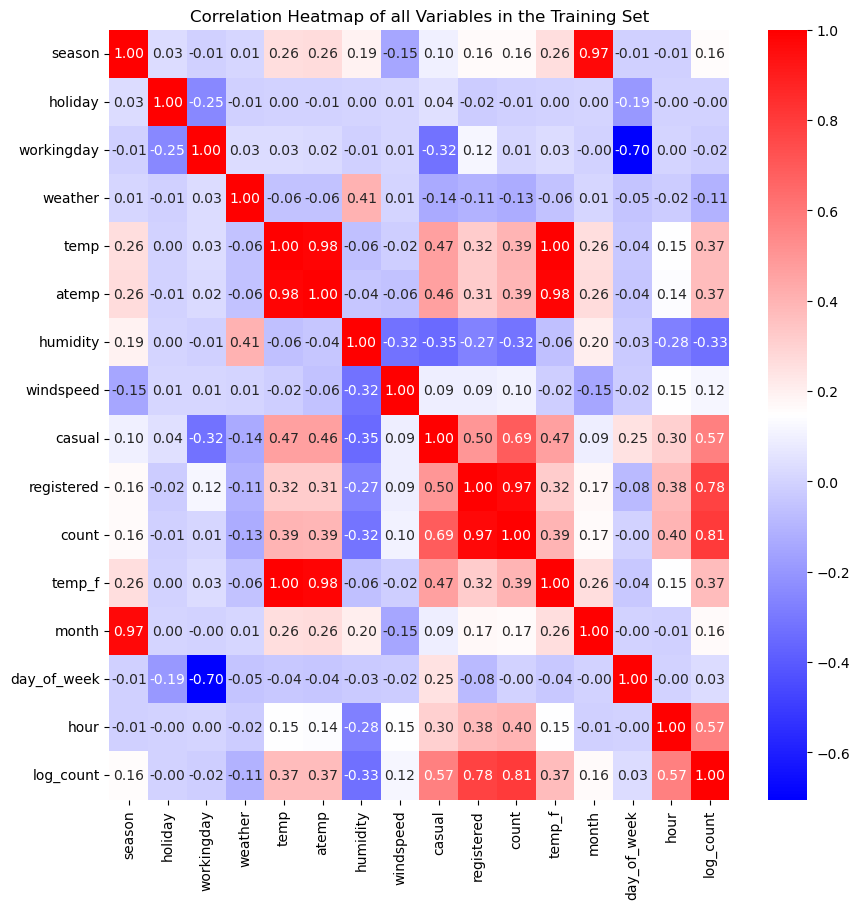

In [ ]:
# Create a correlation matrix heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(training_set.corr(numeric_only=True), cmap='bwr', annot=True, ax=ax, fmt='.2f')
ax.set_title('Correlation Heatmap of all Variables in the Training Set');

In [ ]:
# Double checking that there are only days recorded up to the 19th of each month
training_set['datetime'].dt.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [ ]:
# Double checking that casual/registered together do add up to the total number of rentals
sum(training_set['casual'] + training_set['registered'] == training_set['count']) / len(training_set)

1.0

In [67]:
training_set['day_name'] = training_set['datetime'].dt.day_name()

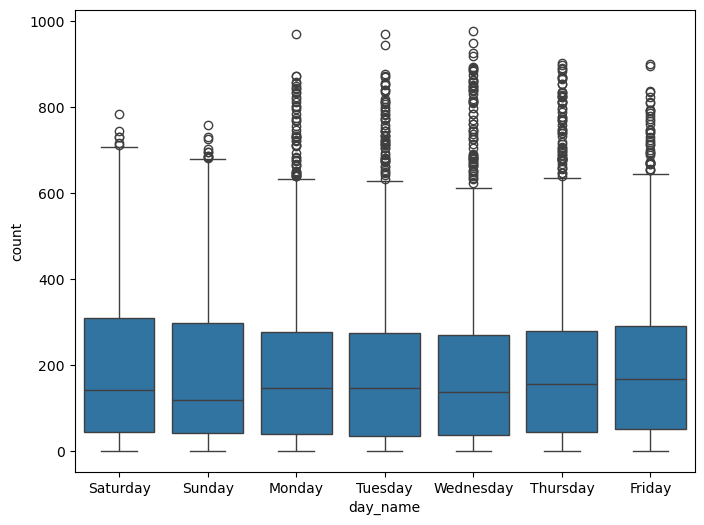

In [ ]:
# Viewing distributions of different days of the week
plt.figure(figsize=(8, 6))
sns.boxplot(data=training_set, x='day_name', y='count');

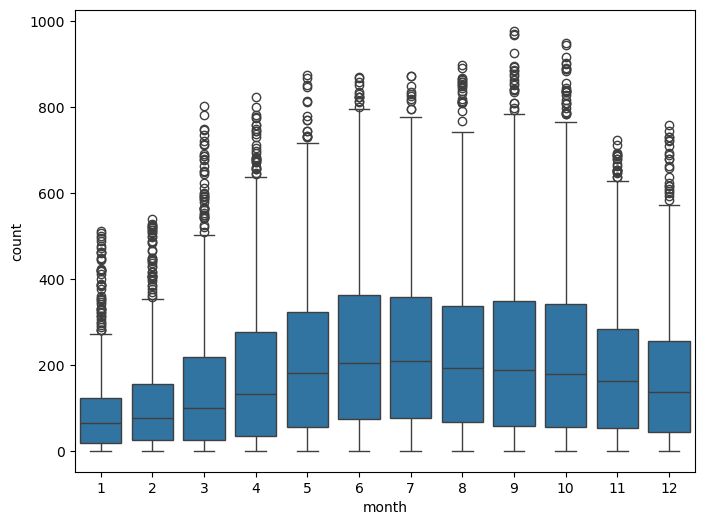

In [ ]:
# Distribution of different months of the year
plt.figure(figsize=(8, 6))
sns.boxplot(data=training_set, x='month', y='count');

In [ ]:
# Create a log(count) column
training_set['log_count'] = np.log(training_set['count'])

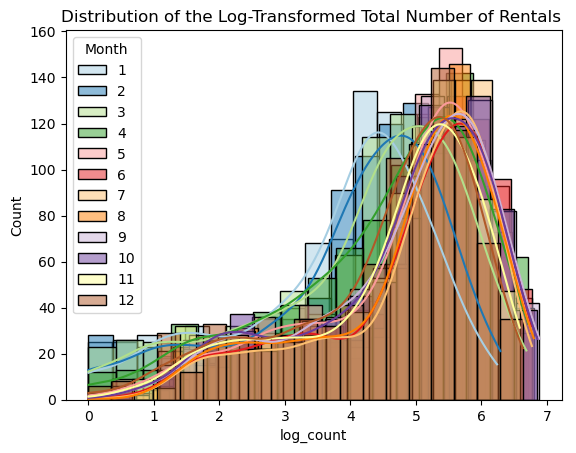

In [ ]:
# Compare distributions
fig, ax = plt.subplots()
colors = sns.color_palette('Paired')
for n, month in enumerate(training_set['month'].unique()):
    data = training_set.loc[training_set['month'] == month]
    sns.histplot(data=data, x='log_count', kde=True, color=colors[n], ax=ax, label=month)

ax.set_title('Distribution of the Log-Transformed Total Number of Rentals ')
plt.legend(title='Month');